In [42]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score


from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn import set_config
set_config("figure")


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC


# Data exploring

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit. This will help to identify potential future customers who will be willing to subscribe for a term deposit. Thus, the bank campaign will be more focused on calling these customers and avoiding customers who will refuse. As a result, the bank can save man power and time.

### The dataset contains 16 features, 1 target variable and 45,211 rows. No missing values were found.

In [2]:
data = pd.read_excel (r'data/bank-full.xlsx')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [9]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [10]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [12]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [13]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [14]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [15]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [16]:
data['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [17]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## Data Cleaning
### I dropped the day, poutcome, pdays, contact, and default columns. As they did not have valuable information.  Also, I changed the month column to season and target variable to accepted. Some values for job and education were “unknown” and were imputed using the most frequent. Target 'y' changed to accepted and converted to binary.

In [18]:
data.drop('contact',axis='columns', inplace=True)
data.drop('day',axis='columns', inplace=True)
data.drop('pdays',axis='columns', inplace=True)
data.drop('poutcome',axis='columns', inplace=True)
data.drop('default',axis='columns', inplace=True)

In [19]:
data["job"] = data["job"].replace(['unknown'],['blue-collar'])

In [20]:
data["education"] = data["education"].replace(['unknown'],['secondary'])

In [21]:
data["month"] = data["month"].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                                      ['winter','winter','spring','spring','spring','summer','summer','summer',
                                      'fall','fall','fall','winter'])
data["y"] = data["y"].replace(['no','yes'],[0,1])

In [22]:
data.rename(columns = {'month':'season'}, inplace = True)
data.rename(columns = {'y':'accepted'}, inplace = True)


### No strong correlations were noticed between the dataset variables.

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

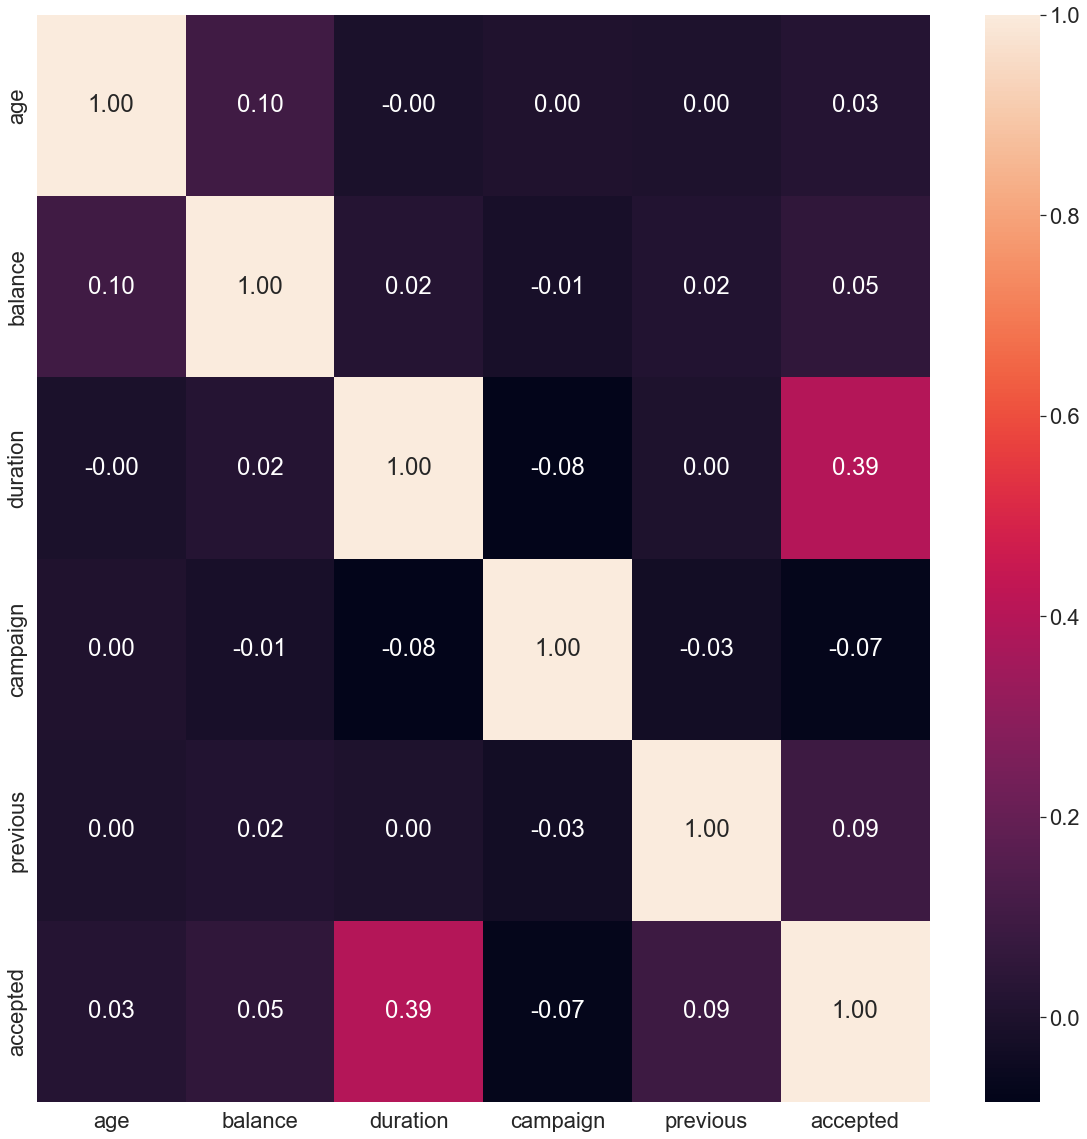

In [23]:
sns.set(font_scale = 2)
plt.tight_layout()
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

### I began by splitting the data into 70% and 30% for train and test set respectively. In assessment of the model quality, I will focus on the model score and model accuracy values, with more concentration on the test set model values.

In [24]:
X = data.drop(['accepted'], axis = 1)
y = data['accepted']

In [25]:
X = pd.get_dummies(X)

In [26]:
object= StandardScaler()
X = pd.DataFrame(object.fit_transform(X), columns=X.columns)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# 1. Logistic Regression

In [28]:
#I used the make_column_selector to select features by datatype. 
selector = make_column_selector(dtype_include=object)

#LogisticRegression with L1 penalty to select features for the model.
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))

In [29]:
#building the pipeline 
lgr_pipe = Pipeline([('selector', extractor),('lgr', LogisticRegression(random_state=42, max_iter = 1000))])
lgr_pipe.fit(X_train, y_train)

Pipeline(steps=[('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear'))),
                ('lgr', LogisticRegression(max_iter=1000, random_state=42))])

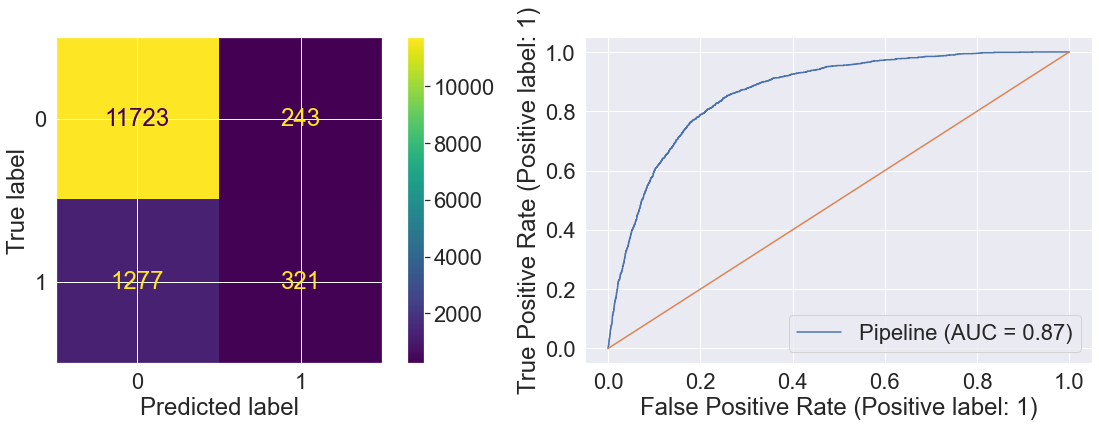

In [30]:
#Examine both the confusion matrix and ROC curve below. 
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

In [31]:
#Calculating the accuracy, precision, and recall values.
preds = lgr_pipe.predict(X_test)
log_accuracy = accuracy_score(y_test, preds)
log_precision = precision_score(y_test, preds)
log_recall = recall_score(y_test, preds)
print(f'Accuracy: {log_accuracy: .2f}\nPrecision: {log_precision: .2f}\nRecall: {log_recall: .2f}')

Accuracy:  0.89
Precision:  0.57
Recall:  0.20


# 2. Decision Tree Classifier

In [32]:
params = {'max_depth': [2, 4, 5, 8,10,30,40],
         'min_samples_split': [0.1, 0.2,0.05,0.01],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'min_samples_leaf': [1,2,5,10]
         }
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)
grid_train_acc = grid.score(X_train, y_train)
tree_grid_test_acc = grid.score(X_test, y_test)
best_params = grid.best_params_
print(f'Best parameters of tree: {best_params}')

Best parameters of tree: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 0.01}


In [33]:
#Calculating the accuracy, precision, and recall values.
preds = grid.predict(X_test)
tree_accuracy = grid.score(X_test, y_test)
tree_precision = precision_score(y_test, preds)
tree_recall = recall_score(y_test, preds)
print(f'Accuracy: {tree_accuracy: .2f}\nPrecision: {tree_precision: .2f}\nRecall: {tree_recall: .2f}')

Accuracy:  0.89
Precision:  0.56
Recall:  0.35


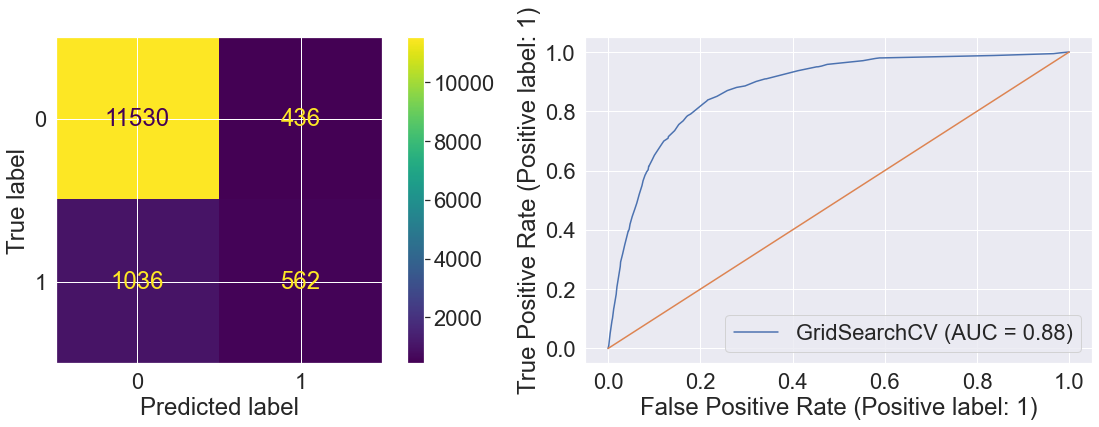

In [34]:
#Examine both the confusion matrix and ROC curve below. 
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, ax = ax[0])

RocCurveDisplay.from_estimator(grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))


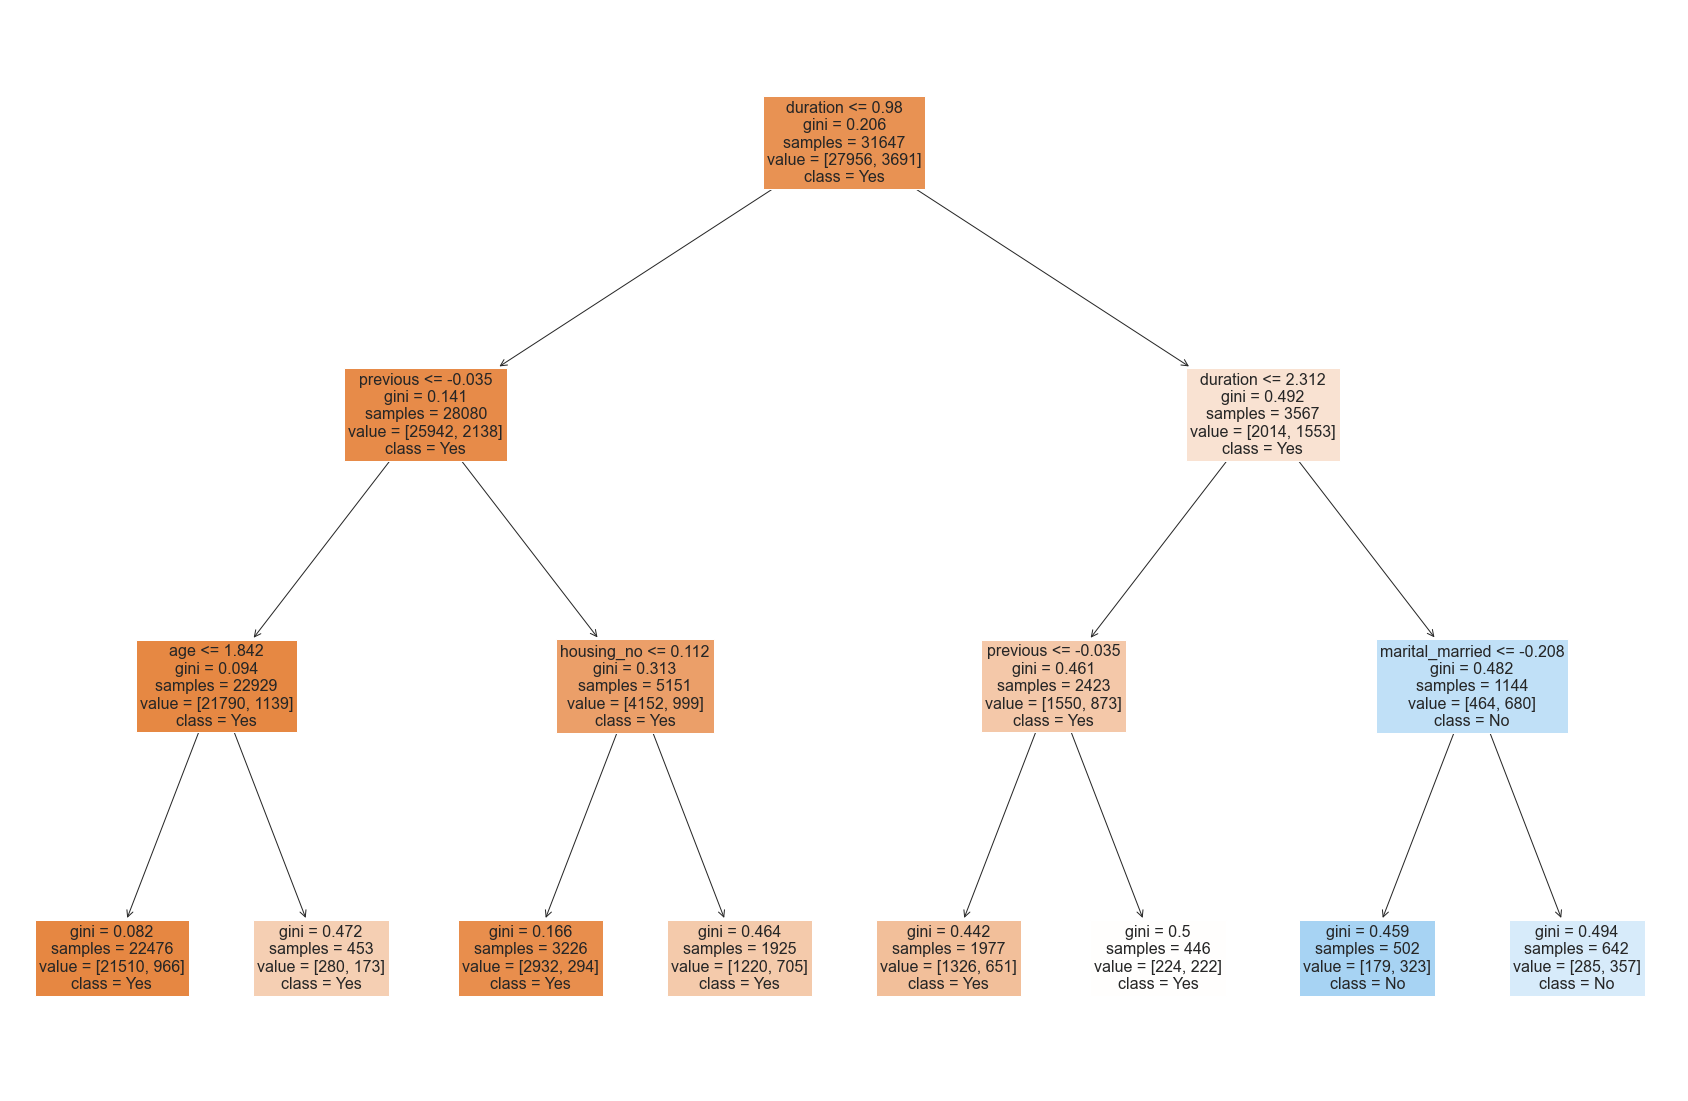

In [35]:
# plotting the decision tree with a max depth of 3 as an example
tree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
fig, ax = plt.subplots(figsize = (30, 20))
plot_tree(tree, feature_names=list(X.columns), filled=True, ax = ax, fontsize=16,class_names=['Yes','No']);

# 3. KNeighbors Classifier

In [36]:
# Identifying the best score model over value of K
knn_pipe = Pipeline([('knn', KNeighborsClassifier())])
grid = GridSearchCV(knn_pipe, param_grid = {'knn__n_neighbors': [2, 5, 10, 20]})
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f'Best parameters of tree: {best_params}')

Best parameters of tree: {'knn__n_neighbors': 10}


In [37]:
#Calculating the accuracy, precision, and recall values.
preds = grid.predict(X_test)
knn_accuracy = grid.score(X_test, y_test)
knn_precision = precision_score(y_test, preds)
knn_recall = recall_score(y_test, preds)
print(f'Accuracy: {knn_accuracy: .2f}\nPrecision: {knn_precision: .2f}\nRecall: {knn_recall: .2f}')

Accuracy:  0.89
Precision:  0.57
Recall:  0.13


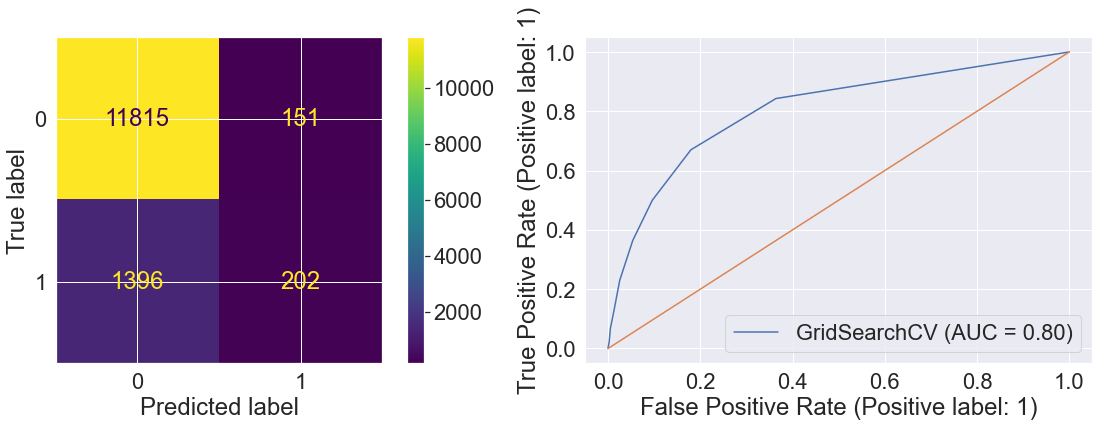

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, ax = ax[0])

RocCurveDisplay.from_estimator(grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

# 4. Support Vector Machines

In [44]:
params = {'kernel': ['rbf', 'poly']}
svc = svm.SVC()
grid = GridSearchCV(svc, param_grid=params).fit(X_train, y_train)

In [45]:
#Calculating the accuracy, precision, and recall values.
preds = grid.predict(X_test)
svc_accuracy = grid.score(X_test, y_test)
svc_precision = precision_score(y_test, preds)
svc_recall = recall_score(y_test, preds)
print(f'Accuracy: {svc_accuracy: .2f}\nPrecision: {svc_precision: .2f}\nRecall: {svc_recall: .2f}')

Accuracy:  0.89
Precision:  0.64
Recall:  0.14


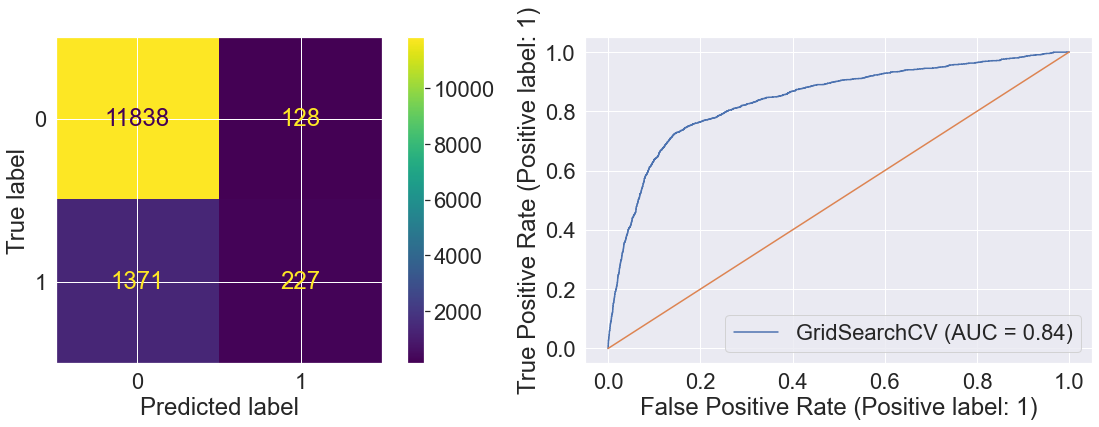

In [46]:
#Examine both the confusion matrix and ROC curve below. 
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, ax = ax[0])

RocCurveDisplay.from_estimator(grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))


In [47]:
pd.DataFrame({'Model': ['Logistic', 'Decision Tree', 'KNeighbors Classifier','Support Vector Machines'], 
             'Best Score': [0.89, 0.89, 0.89,0.89],
             'Precision': [0.57,0.56, 0.57,0.64],
             'Recall': [0.20,0.35,0.13,0.14],
             'Area Under the Curve': [0.87,0.88,0.80,0.84]}).set_index('Model')

,Best Score,Precision,Recall,Area Under the Curve
Model,,,,
Logistic,0.89,0.57,0.20,0.87
Decision Tree,0.89,0.56,0.35,0.88
KNeighbors Classifier,0.89,0.57,0.13,0.80
Support Vector Machines,0.89,0.64,0.14,0.84


# Conclusion

All models have the same score (accuracy). However, variability is noticed in precision, recall and AUC. Although it did not have the highest precision, I would choose the decision tree model as it had the highest recall and AUC scores.

A classification using decision tree with criterion = gini, max depth = 8, min samples leaf = 5, min samples split = 0.01 will assure that the false negatives are minimal. As a result, the minimum number of potential customers for a term deposit subscription will be missed.

Limitations:
- A low recall score means high number of false negatives which can be a result of imbalanced class. 
- The model might be overfitted
- Using decision tree classifier had the longest computation time compared to other classifiers.

## Recommendations

Identifying important features to include in the model would improve the model scores and prevent overfitting.